In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesRegressor
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
feat_df = pd.read_csv("training_set_features.csv")

In [3]:
feat_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
label_df = pd.read_csv("training_set_labels.csv")
label_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
df = pd.merge(feat_df, label_df, how='outer', on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df.shape

(26707, 38)

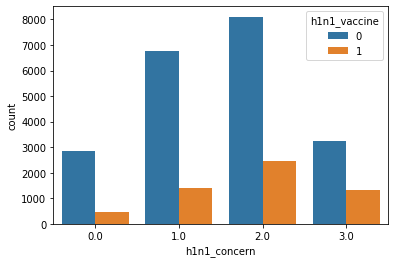

In [31]:
sns.countplot(x='h1n1_concern', hue='h1n1_vaccine', data=df)

In [7]:
df['h1n1_vaccine'].value_counts()/len(df)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [8]:
df['seasonal_vaccine'].value_counts()/len(df)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [34]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Sex of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rent_or_own - Housing situation of respondent.

employment_status - Employment status of respondent.

hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

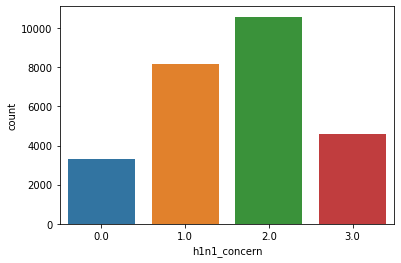

In [51]:
sns.countplot(x='h1n1_concern', data=df)

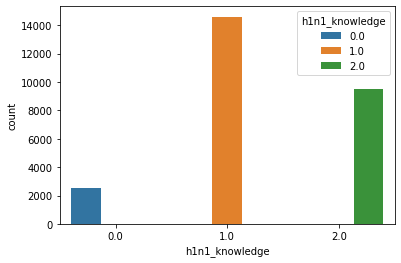

In [52]:
sns.countplot(x='h1n1_knowledge', hue='h1n1_knowledge', data=df)

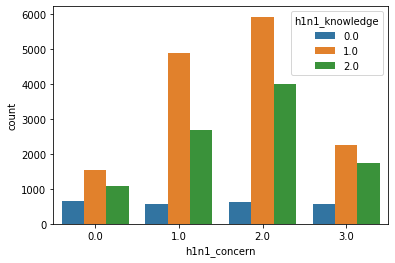

In [9]:
sns.countplot(x='h1n1_concern', hue='h1n1_knowledge', data=df)

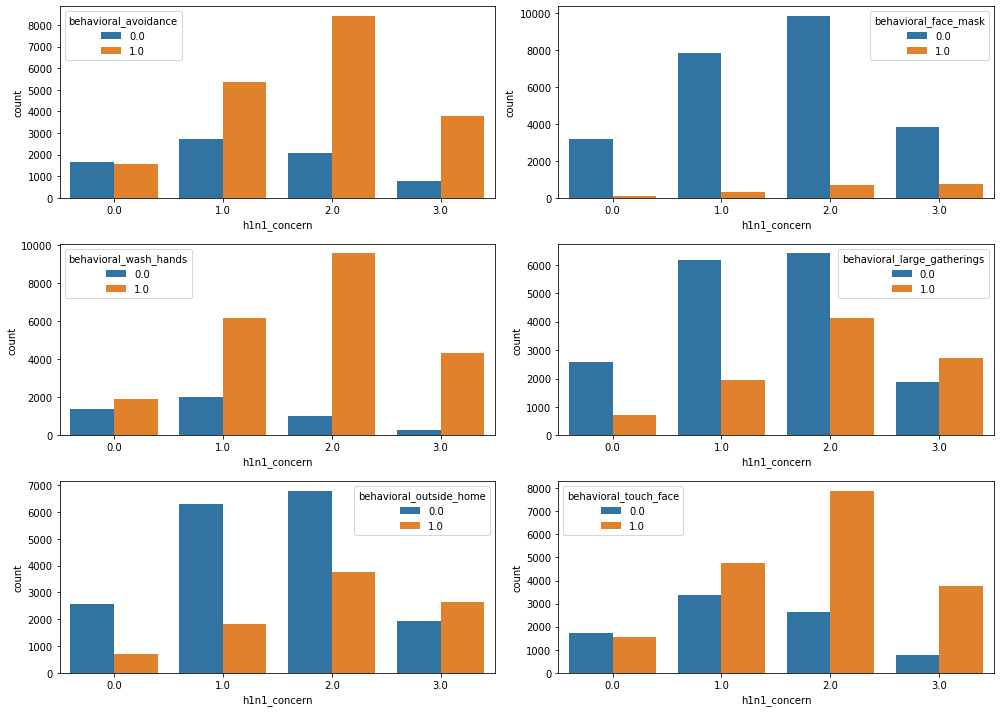

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(14,10))

sns.countplot(x='h1n1_concern', hue='behavioral_avoidance', data=df, ax=ax[0,0])
sns.countplot(x='h1n1_concern', hue='behavioral_face_mask', data=df, ax=ax[0,1])
sns.countplot(x='h1n1_concern', hue='behavioral_wash_hands', data=df, ax=ax[1,0])
sns.countplot(x='h1n1_concern', hue='behavioral_large_gatherings', data=df, ax=ax[1,1])
sns.countplot(x='h1n1_concern', hue='behavioral_outside_home', data=df, ax=ax[2,0])
sns.countplot(x='h1n1_concern', hue='behavioral_touch_face', data=df, ax=ax[2,1])
plt.tight_layout()

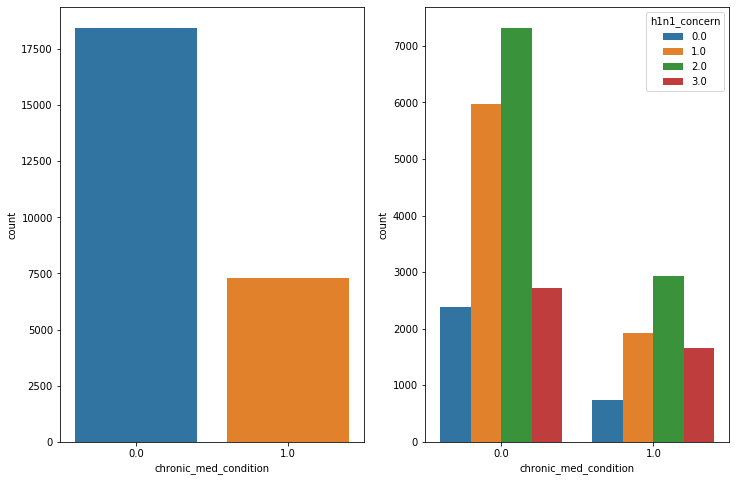

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.countplot(x='chronic_med_condition', data=df, ax=ax[0])
sns.countplot(x='chronic_med_condition', hue='h1n1_concern', data=df, ax=ax[1])

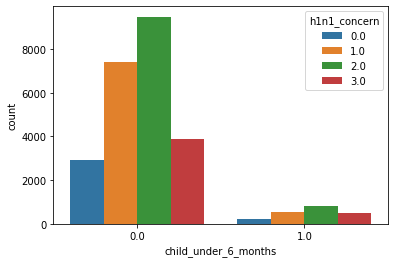

In [26]:
sns.countplot(x='child_under_6_months', hue='h1n1_concern', data=df)

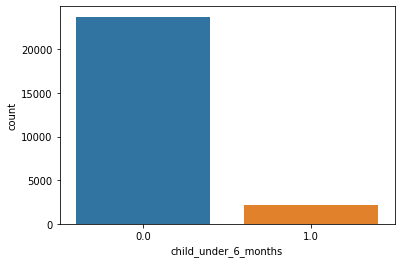

In [27]:
sns.countplot(x='child_under_6_months', data=df)

In [33]:
len(df[(df['child_under_6_months']==1.0) & (df['h1n1_concern']==3.0)])/len(df[(df['child_under_6_months']==1.0) & (df['h1n1_concern']==0.0)])

2.2317596566523603

In [34]:
len(df[(df['child_under_6_months']==0.0) & (df['h1n1_concern']==3.0)])/len(df[(df['child_under_6_months']==0.0) & (df['h1n1_concern']==0.0)])

1.3339058742700103

In [39]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

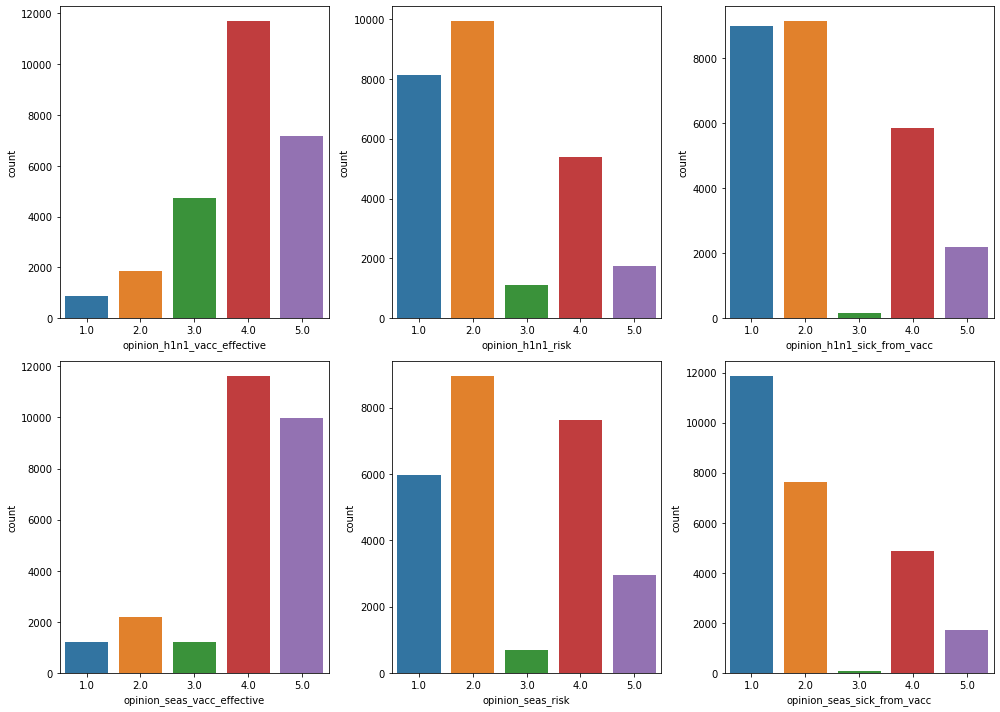

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(14,10))

sns.countplot(x='opinion_h1n1_vacc_effective',  data=df, ax=ax[0,0])
sns.countplot(x='opinion_h1n1_risk', data=df, ax=ax[0,1])
sns.countplot(x='opinion_h1n1_sick_from_vacc', data=df, ax=ax[0,2])
sns.countplot(x='opinion_seas_vacc_effective', data=df, ax=ax[1,0])
sns.countplot(x='opinion_seas_risk', data=df, ax=ax[1,1])
sns.countplot(x='opinion_seas_sick_from_vacc', data=df, ax=ax[1,2])
plt.tight_layout()

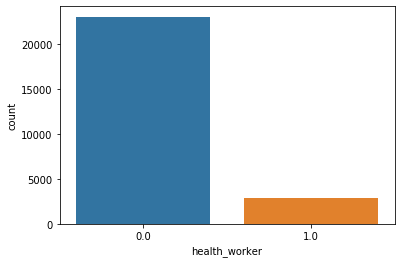

In [42]:
sns.countplot(x='health_worker', data=df)

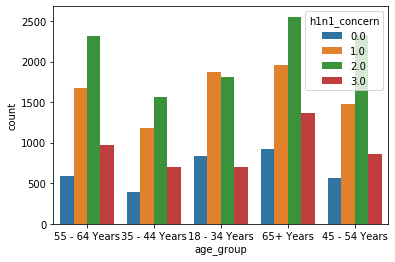

In [44]:
sns.countplot(x='age_group', hue='h1n1_concern', data=df)

In [46]:
df['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

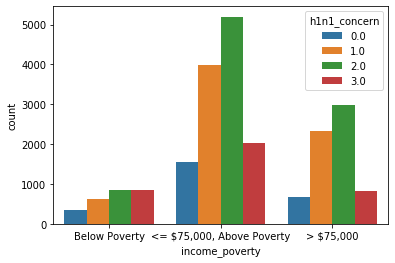

In [47]:
sns.countplot(x='income_poverty', hue='h1n1_concern', data=df)

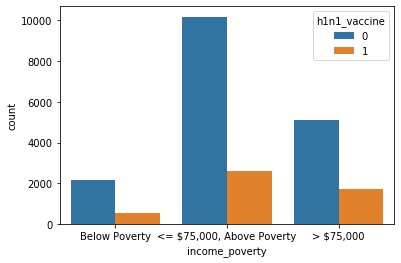

In [48]:
sns.countplot(x='income_poverty', hue='h1n1_vaccine', data=df)

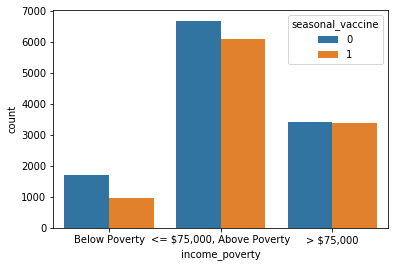

In [49]:
sns.countplot(x='income_poverty', hue='seasonal_vaccine', data=df)

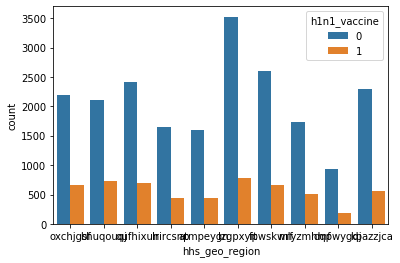

In [50]:
sns.countplot(x='hhs_geo_region', hue='h1n1_vaccine', data=df)

In [53]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

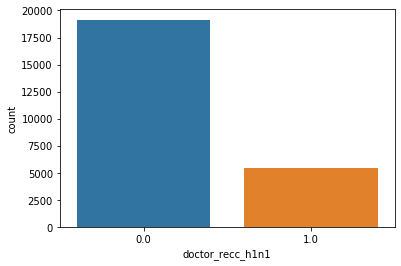

In [54]:
sns.countplot('doctor_recc_h1n1', data=df)

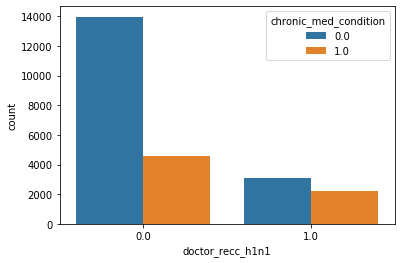

In [55]:
sns.countplot('doctor_recc_h1n1', hue='chronic_med_condition', data=df)

In [56]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [57]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [7]:
object_df = df.select_dtypes(include='object')
object_df.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


In [8]:
object_df.isnull().sum().sort_values(ascending=False)/len(object_df)*100

employment_occupation    50.436215
employment_industry      49.912008
income_poverty           16.561201
rent_or_own               7.645936
employment_status         5.477965
marital_status            5.272026
education                 5.268282
census_msa                0.000000
hhs_geo_region            0.000000
sex                       0.000000
race                      0.000000
age_group                 0.000000
dtype: float64

In [62]:
object_df.nunique()

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      21
employment_occupation    23
dtype: int64

In [70]:
object_df['education'].value_counts()/len(object_df)*100

College Graduate    37.806568
Some College        26.371363
12 Years            21.705920
< 12 Years           8.847868
Name: education, dtype: float64

In [71]:
object_df['employment_status'].value_counts()/len(object_df)*100

Employed              50.773206
Not in Labor Force    38.308309
Unemployed             5.440521
Name: employment_status, dtype: float64

In [78]:
object_df['income_poverty'].value_counts()/len(object_df)*100

<= $75,000, Above Poverty    47.841390
> $75,000                    25.498933
Below Poverty                10.098476
Name: income_poverty, dtype: float64

In [79]:
object_df['employment_occupation'].value_counts()/len(object_df)*100

xtkaffoo    6.657431
mxkfnird    5.650204
emcorrxb    4.755308
cmhcxjea    4.669188
xgwztkwe    4.051372
hfxkjkmi    2.868162
qxajmpny    2.051897
xqwwgdyp    1.816003
kldqjyjy    1.756094
uqqtjvyb    1.692440
tfqavkke    1.452803
ukymxvdu    1.392893
vlluhbov    1.325495
oijqvulv    1.288052
ccgxvspp    1.276819
bxpfxfdn    1.239375
haliazsg    1.108324
rcertsgn    1.033437
xzmlyyjv    0.928595
dlvbwzss    0.849964
hodpvpew    0.778822
dcjcmpih    0.554162
pvmttkik    0.366945
Name: employment_occupation, dtype: float64

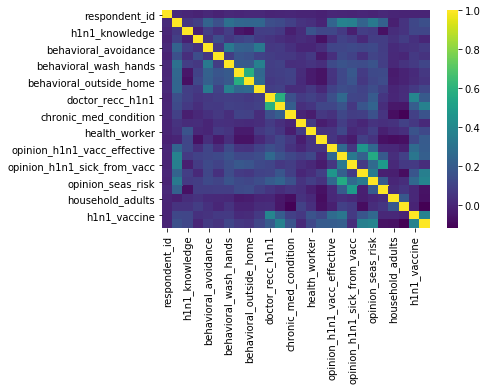

In [82]:
sns.heatmap(df.corr(), cmap='viridis')

In [83]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

In [12]:
non_object_df = df.select_dtypes(exclude='object')
corr_df = non_object_df.corr()

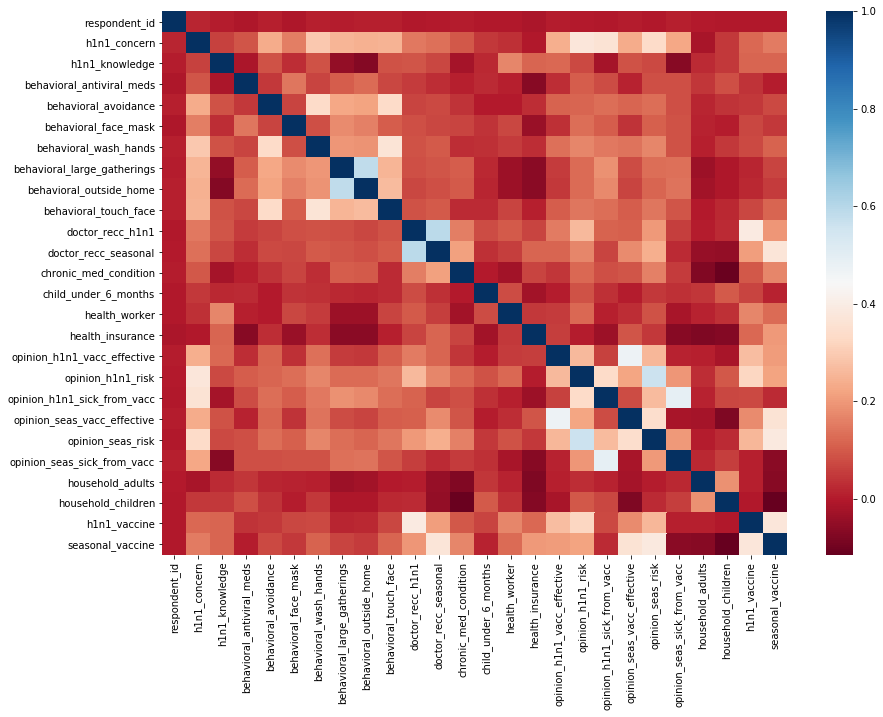

In [88]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_df, cmap='RdBu')

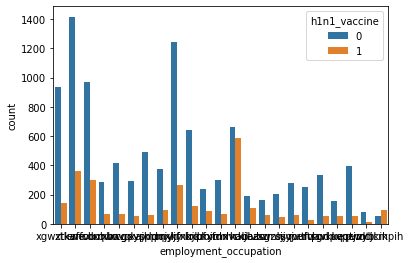

In [89]:
sns.countplot('employment_occupation', hue='h1n1_vaccine', data=df)

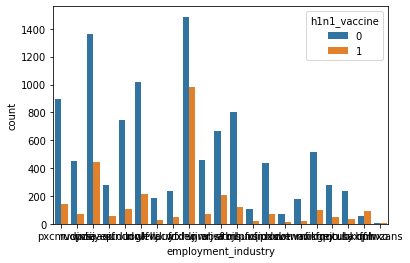

In [90]:
sns.countplot('employment_industry', hue='h1n1_vaccine', data=df)

In [8]:
#object_df.drop(["employment_occupation", "employment_industry"], axis=1, inplace=True)

In [6]:
df.drop(["respondent_id", "employment_occupation", "employment_industry"], axis=1, inplace=True)

In [7]:
#non_object_df.isnull().sum().sort_values(ascending=False)/len(non_object_df)*100

In [8]:
#non_object_df['health_insurance'].value_counts()/len(non_object_df)*100

In [9]:
#for col in non_object_df.columns:
#    print(non_object_df[col].value_counts()/len(non_object_df)*100)

In [10]:
#object_df.head()

In [11]:
#for col in object_df.columns:
#    print(object_df[col].value_counts())
#    print()

In [12]:
#df['census_msa'].dtypes=='O'

In [7]:
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)

In [8]:
y = df[['h1n1_vaccine', 'seasonal_vaccine']]

In [19]:
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

In [18]:
#X.loc[:, cat_cols]

In [44]:
class Imputer(BaseEstimator, TransformerMixin):
    
    """
    
    
    """
    
    def __init__(self, imputer_num, cat_cols, num_cols):
        
        """
        
        """
        
        self.imputer_num = imputer_num
        self.cat_cols = cat_cols
        self.num_cols = num_cols
    
    def fit(self, X, y=None):
        
        """
        
        """
        
        self.SimpleImputer(strategy='most_frequent').fit(X.loc[:, cat_cols])
        self.imputer_num.fit(X.loc[:, num_cols])
       
        return self
        
    def transform(self, X):
        
        """
        
        
        """
        
        X_cat_imputed = pd.DataFrame(self.SimpleImputer(strategy='most_frequent').transform(X.loc[:, cat_cols]), columns=cat_cols)
        X_num_imputed = pd.DataFrame(self.imputer_num.transform(X.loc[:, num_cols]), columns=num_cols)
            
        df_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)
        
        return df_imputed

In [45]:
class CreateDummies(BaseEstimator, TransformerMixin):
    
    """
    
    """

    def fit(self, X, y=None):
        """
        
        """
        return self
    
    def transform(self, X):
        """
        
        """
        
        X_encoded = pd.get_dummies(X, drop_first=True)
        return X_encoded

In [46]:
def create_pipeline(clf, cat_cols, num_cols):
    
    """
    
    """
    pipeline = Pipeline([
                       ('imputer', Imputer(imputer_num, cat_cols, num_cols)),
                       ('encoder', CreateDummies()),
                       ('normalizer', MinMaxScaler()),
                       ('classifier', OneVsRestClassifier(clf))
                        ])
    return pipeline

In [47]:
def build_model(pipeline, param_grid, X_train, y_train):
    
    """
    
    """

    grid_cv = GridSearchCV(pipeline, param_grid=param_grid, verbose=2)
    grid_cv.fit(X_train, y_train)
    
    return grid_cv

In [48]:
def model_eval(model, X_test, y_test):
    
    """
    
    
    """
    
    model_pred = model.predict_proba(X_test)
    
    model_score = roc_auc_score(y_true=y_test, y_score=model_pred, average='weighted')
    
    return model_score

In [49]:
imputer_algos = [SimpleImputer(), KNNImputer(), IterativeImputer()]

clf_algos = [LogisticRegression(class_weight='balanced'), KNeighborsClassifier(), 
             RandomForestClassifier(class_weight='balanced'), AdaBoostClassifier(), 
             GradientBoostingClassifier(), XGBClassifier()]

lr_simplez_param_grid = {
                 'imputer__imputer_num__strategy': ['median', 'most_frequent'],
                                        KNNImputer(n_neighbors=5), KNNImputer(n_neighbors=10), 
                                        IterativeImputer(estimator=BayesianRidge()),
                                        IterativeImputer(estimator=ExtraTreesRegressor())],
                 'classifier__estimator__C': [0.01, 0.05, 0.1, 0.5]}

knn_param_grid = {
                 'imputer__imputer_num': [SimpleImputer(strategy='median'), SimpleImputer(strategy='most_frequent'),
                                        KNNImputer(n_neighbors=5), KNNImputer(n_neighbors=10), 
                                        IterativeImputer(estimator=BayesianRidge()),
                                        IterativeImputer(estimator=ExtraTreesRegressor())],
                 'classifier__estimator__n_neighbors': [10, 30, 50, 70]}

rf_param_grid = {
                 'imputer__imputer_num': [SimpleImputer(strategy='median'), SimpleImputer(strategy='most_frequent'),
                                        KNNImputer(n_neighbors=5), KNNImputer(n_neighbors=10), 
                                        IterativeImputer(estimator=BayesianRidge()),
                                        IterativeImputer(estimator=ExtraTreesRegressor())],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__criterion': ['gini', 'entropy']}

ada_param_grid = {
                 'imputer__imputer_num': [SimpleImputer(strategy='median'), SimpleImputer(strategy='most_frequent'),
                                        KNNImputer(n_neighbors=5), KNNImputer(n_neighbors=10), 
                                        IterativeImputer(estimator=BayesianRidge()),
                                        IterativeImputer(estimator=ExtraTreesRegressor())],
                 'classifier__estimator__n_estimators': [50, 80, 110, 150],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}


grad_param_grid = {
                 'imputer__imputer_num': [SimpleImputer(strategy='median'), SimpleImputer(strategy='most_frequent'),
                                        KNNImputer(n_neighbors=5), KNNImputer(n_neighbors=10), 
                                        IterativeImputer(estimator=BayesianRidge()),
                                        IterativeImputer(estimator=ExtraTreesRegressor())],
                 'classifier__estimator__n_estimators': [100, 120, 140, 160],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

xgb_param_grid = {
                 'imputer__imputer_num': [SimpleImputer(strategy='median'), SimpleImputer(strategy='most_frequent'),
                                        KNNImputer(n_neighbors=5), KNNImputer(n_neighbors=10), 
                                        IterativeImputer(estimator=BayesianRidge()),
                                        IterativeImputer(estimator=ExtraTreesRegressor())],
                 'classifier__estimator__learning_rate': [0.001, 0.01, 0.05, 0.1]}

param_grid_list = [lr_param_grid, knn_param_grid, rf_param_grid, ada_param_grid, grad_param_grid, xgb_param_grid]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_train.shape, X_test.shape

((21365, 33), (5342, 33))

In [50]:
for clf, param_grid in zip(clf_algos, param_grid_list):
    
    pipeline = create_pipeline(clf, cat_cols=cat_cols, num_cols=num_cols)
    model = build_model(clf=clf, param_grid=param_grid, X_train=X_train, y_train=y_train)
    print("fitting the model {}".format(clf))
    
    model_train_score = model_eval(model, X_train, y_train)
    model_test_score = model_eval(model, X_test, y_test)
    print("the train set score is {}".format(model_train_score))
    print("the test set score is {}".format(model_test_score))

NameError: name 'imputer_num' is not defined